**Qingbo Liu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [10]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA` object called `pca` based on the DataFrame object that you just created.

In [11]:
iris_data = pd.read_csv('data/iris.csv')
print(iris_data.head(5))

pca = pca_cov.PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [12]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Tes `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [13]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [14]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [15]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (149, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.545

In [16]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (149, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (149, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.1/7.9 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

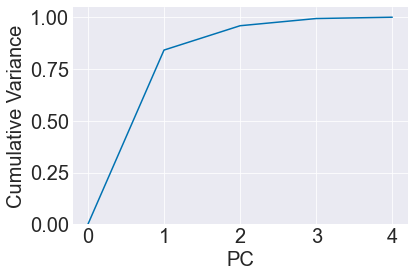

In [17]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** If I use the 90% rule, I would drop two PCs and keep only the first two PCs. This choice is also backed by the fact that the first two PCs account for most of the variation and the last two have very small variance.

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [18]:
pcs_to_keep = [0, 1]
_ = pca.pca_project(pcs_to_keep)

##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

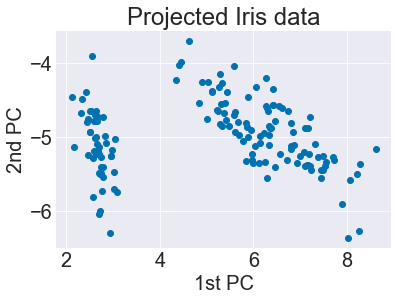

In [19]:
fig, ax = plt.subplots()

ax.scatter(pca.A_proj[:, 0], pca.A_proj[:, 1])
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
_ = ax.set_title('Projected Iris data')


### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC0)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

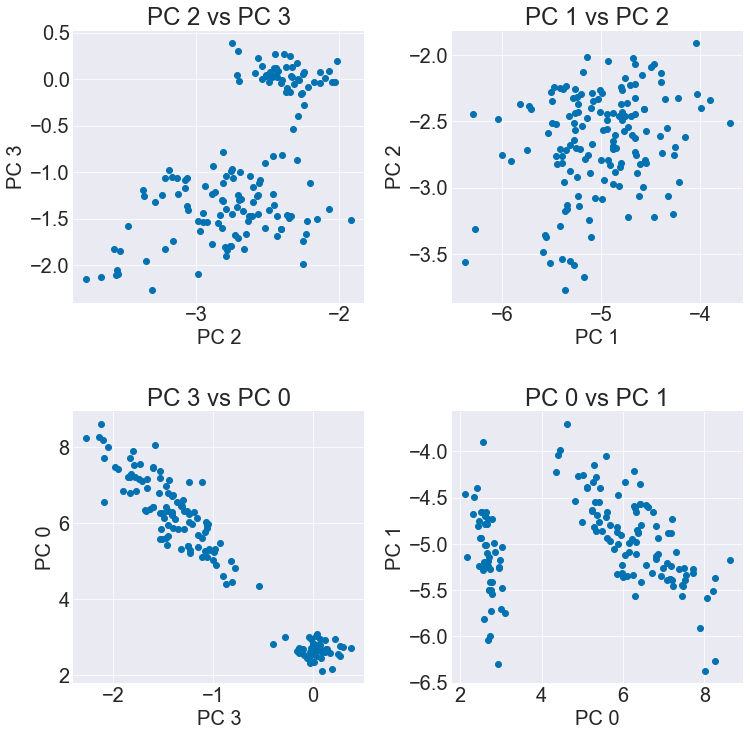

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
pcs_to_keep = [[2, 3], [1, 2], [3, 0], [0, 1]]

for i in range(2):
    for j in range(2):
        pcs_keep = pcs_to_keep[i*2+j]
        pca.pca_project(pcs_keep)
        ax[i, j].scatter(pca.A_proj[:, 0], pca.A_proj[:, 1])
        ax[i, j].set_xlabel(f'PC {pcs_keep[0]}')
        ax[i, j].set_ylabel(f'PC {pcs_keep[1]}')
        ax[i, j].set_title(f'PC {pcs_keep[0]} vs PC {pcs_keep[1]}')
        
fig.subplots_adjust(hspace=0.4, wspace=0.3)

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** It is clear that the plot `PC0 vs PC1` accounts for most of the variations as there are two distinct clusters in the plot. `PC3 vs PC0` is also significant in that there are two separated clusters within the plot, but there is still a trend. The other two plots show that their combination cannot capture much information in the data because the data looks to be ranomly scattered in the plots. 

### 1d) Loading plot (or heatmap for sections A/C)

Visualize how the top two principal components relate to original data variables.

- Implement `loading_plot` (or heatmap for sections A/C) in `pca_cov.py`

#### Test `loading_plot` (or heatmap for sections A/C)

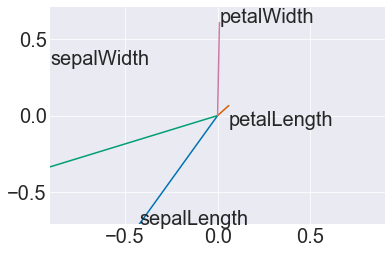

In [21]:
pca.loading_plot()
plt.show()

**Question 3:** What do the loadings (or heatmap for sections A/C) tell us what the first two PCs measure, with respect to the original data axes?

**Question 3 answer:**  The first PC measures negatively sepalWidth, sepalLength, and negatively petalLength (though the association with this is weaker than with the former two). The second PC measures positively petalWidth and petalLength.

**Question 4:** What do the loadings (or heatmap for sections A/C) tell us about correlations among the original data axes?

**Question 4 answer:** PetalLength and sepal legnth are negatively correlated, and the correlation between sepalWidth and petalWidth is weak. 

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables 'sepalLength', 'sepalWidth' of the Iris data **normalized separately**.
- In the 2nd cell below, do PCA on the normalized Iris data and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables ('sepalLength', 'sepalWidth' — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

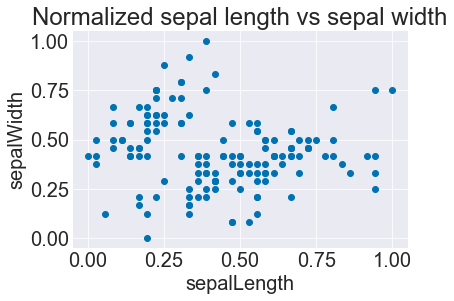

In [22]:
# Plot original iris data normalized

normalize_data = iris_data.copy()
norm_min = normalize_data.min(axis=0)
norm_max = normalize_data.max(axis=0)
normalize_data = (normalize_data - norm_min)/(norm_max - norm_min)

fig, ax = plt.subplots()
ax.scatter(normalize_data['sepalLength'], normalize_data['sepalWidth'])
ax.set_xlabel('sepalLength')
ax.set_ylabel('sepalWidth')
_ = ax.set_title('Normalized sepal length vs sepal width')

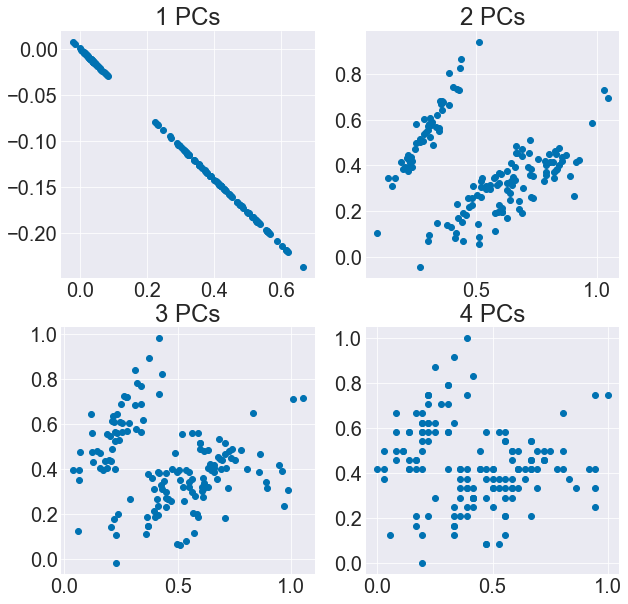

In [26]:
# 2x2 grid of scatter plots
pca = pca_cov.PCA_COV(normalize_data)

vars = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
pca.pca(vars)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        projected = pca.pca_then_project_back(i*2+j+1)
        ax[i, j].scatter(projected[:, 0], projected[:, 1])
        ax[i, j].set_title(f'{i*2+j+1} PCs')


**Question 5:** How well does each of the re-projections compress the original data? Briefly interpret what the above 2x2 grid means.

**Question 5 answer:** The upper-left plot reduces the data in effect to a single dimensional data, if we view it in a rotated 1-d space. This means that re-projection with one eigenvector completely has eliminated redundant information and pushes compression capability to the maximum. The upper-right plot and the lower-left plots also compress the data and divide it into two distinct clusters. We are able to retain more information after re-projection. The lower-right plot reprojects data into the original shape because no information is lost. 

## Task 2: PCA on Australia dataset and one other dataset

Do PCA on:
- the Australia dataset
- one other dataet of your choice

In the cells below, include at minimum

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

### 2a) Australia dataset PCA

Do a PCA (**with data normalization**), but include only the following variables in the data matrix:

    premin, premax, salmin, salmax, minairtemp, maxairtemp, minsst, maxsst, minsoilmoist, maxsoilmoist, and runoffnew

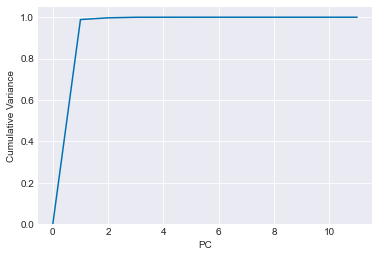

In [7]:
aus_data = pd.read_csv('data/AustraliaCoast.csv')

vars = ['premin', 'premax', 'salmin', 'salmax', 'minairtemp', 'maxairtemp',
                     'minsst', 'maxsst', 'minsoilmoist', 'maxsoilmoist', 'runoffnew']

pca = pca_cov.PCA_COV(aus_data)
pca.pca(vars)

pca.elbow_plot()

From the elbow plot above it is evident that the first PC accounts for over 90% of the variance of the dataset while other variables are not significant in terms of proportional variance. I decide to retain only the first two variables. 

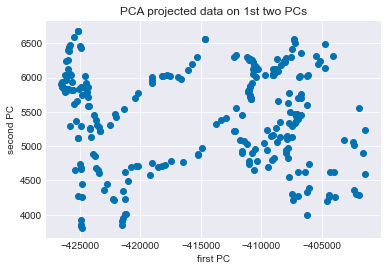

In [8]:
aus_projected = pca.pca_project([0, 1])
fig, ax = plt.subplots()

ax.scatter(aus_projected[:, 0], aus_projected[:, 1])
ax.set_xlabel('first PC')
ax.set_ylabel('second PC')
_ = ax.set_title('PCA projected data on 1st two PCs')

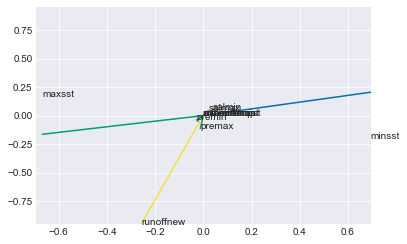

In [19]:
pca.loading_plot()

The first PC is positively associated with minsst and negatively associated with maxsst. The second PC is negatively associated with runoffnew. Other variables do not have evident associations with PCs. Also note that minsst and maxsst are negatively correlated with each other and there is a weak correlation between the pairs (maxsst, runoffnew) and (runoffnew, minsst).

### 2b) Other dataset PCA

**Make sure you describe what the dataset is, what variables are, where you got it.**

Include at minimum below:

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

I have included a dataset that records video game sales, including the ratings given by both users and experts. 

In [20]:
vg_sales = pd.read_csv('data/vgsales.csv')

# drop infs and NaNs 
vg_sales = vg_sales.replace([np.inf, -np.inf], np.nan).dropna()


pca = pca_cov.PCA_COV(vg_sales)

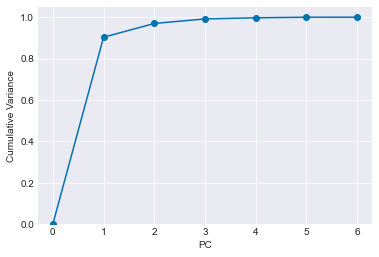

In [21]:
pca.pca(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], normalize=True)

pca.elbow_plot()

Since the first PCs account for over 90% variance of the data, it is reasonable to take just the first two PCs.

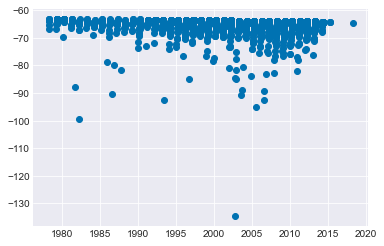

In [22]:
projected = pca.pca_project([0, 1])
fig, ax = plt.subplots()
_ = ax.scatter(projected[:, 0], projected[:, 1])

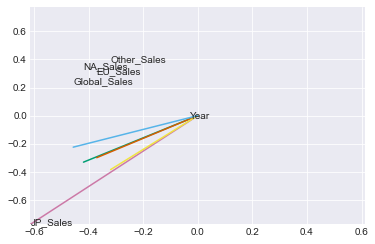

In [23]:
pca.loading_plot()

Unfortunately the labels are mixed together so it is hard to tell what labels correspond to the lines. 